# Table of Contents
* [Load / Data Preparation](#1)
* [Select and Explore Subset](#2)
* [p-Scores by Age Group](#3)
* [Historical Development (looking for trends)](#4)

In [1]:
# PACKAGES

# standard
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt

<a id='1'></a>
# Load / Data Preparation

In [2]:
# read file + show overview
df = pd.read_csv('../input/excess-mortality-during-the-covid19-pandemic/excess_mortality.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   location                           5174 non-null   object 
 1   date                               5174 non-null   object 
 2   p_scores_all_ages                  4694 non-null   float64
 3   p_scores_15_64                     2881 non-null   float64
 4   p_scores_65_74                     2881 non-null   float64
 5   p_scores_75_84                     2881 non-null   float64
 6   p_scores_85plus                    2881 non-null   float64
 7   deaths_2020_all_ages               3378 non-null   float64
 8   average_deaths_2015_2019_all_ages  3396 non-null   float64
 9   deaths_2015_all_ages               3162 non-null   float64
 10  deaths_2016_all_ages               3274 non-null   float64
 11  deaths_2017_all_ages               3344 non-null   float

In [3]:
# convert date + extract features
df.date = pd.to_datetime(df.date)
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

In [4]:
# locations
loc_freq = df.location.value_counts()
print(loc_freq)

Australia                 81
Denmark                   81
Belgium                   81
Montenegro                81
Mayotte                   81
                          ..
Belarus                   18
Armenia                   18
Bosnia and Herzegovina    18
Greenland                 18
Ukraine                   18
Name: location, Length: 102, dtype: int64


In [5]:
# show all locations
loc_list = loc_freq.index.tolist()
loc_list.sort() # sort alphabetically
print(loc_list)

['Albania', 'Andorra', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Egypt', 'El Salvador', 'England & Wales', 'Estonia', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'Georgia', 'Germany', 'Gibraltar', 'Greece', 'Greenland', 'Guadeloupe', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kosovo', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Malaysia', 'Malta', 'Martinique', 'Mauritius', 'Mayotte', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'North Macedonia', 'Northern Ireland', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Reunion', 'Romania', 'Russia', 'San Marino',

<a id='2'></a>
# Select and Explore Subset

In [6]:
# select specific location + year
my_loc = 'Germany'
my_year = 2020
df_select = df[(df.location==my_loc) & (df.year==my_year)].copy()
# show table
df_select

,location,date,p_scores_all_ages,p_scores_15_64,p_scores_65_74,p_scores_75_84,p_scores_85plus,deaths_2020_all_ages,average_deaths_2015_2019_all_ages,deaths_2015_all_ages,...,deaths_2010_all_ages,deaths_2011_all_ages,deaths_2012_all_ages,deaths_2013_all_ages,deaths_2014_all_ages,deaths_2021_all_ages,time,time_unit,year,month
1647,Germany,2020-01-05,-1.78,-2.69,-6.60,-1.36,0.11,18883.0,19225.2,18713.0,...,17560.0,18087.0,17762.0,18243.0,16785.0,24790.0,1,weekly,2020,1
1648,Germany,2020-01-12,-0.71,-2.99,-2.23,-1.34,1.33,19408.0,19546.4,19283.0,...,17776.0,17495.0,17145.0,17933.0,17210.0,24444.0,2,weekly,2020,1
1649,Germany,2020-01-19,-3.02,-0.86,-5.69,-3.59,-2.27,18953.0,19542.6,19500.0,...,17309.0,16652.0,17454.0,18251.0,16814.0,24037.0,3,weekly,2020,1
1650,Germany,2020-01-26,-4.73,-6.29,-1.38,-4.10,-5.82,18827.0,19762.4,19346.0,...,17455.0,16909.0,16919.0,18861.0,16825.0,22587.0,4,weekly,2020,1
1651,Germany,2020-02-02,-3.28,-3.58,-2.79,-1.52,-4.90,19774.0,20443.8,20716.0,...,17590.0,17681.0,17631.0,19980.0,17366.0,21681.0,5,weekly,2020,2
1652,Germany,2020-02-09,-6.91,-5.77,-5.87,-7.64,-7.11,19038.0,20451.4,20905.0,...,17701.0,17346.0,18370.0,20026.0,17534.0,20878.0,6,weekly,2020,2
1653,Germany,2020-02-16,-6.41,-4.85,-7.18,-4.79,-8.06,19648.0,20993.0,22395.0,...,18077.0,17294.0,18914.0,20373.0,17422.0,20403.0,7,weekly,2020,2
1654,Germany,2020-02-23,-11.63,-8.91,-8.81,-8.87,-15.93,18953.0,21448.4,23264.0,...,17898.0,17237.0,18629.0,20776.0,17211.0,18887.0,8,weekly,2020,2
1655,Germany,2020-03-01,-11.16,-9.22,-12.61,-9.81,-12.45,19505.0,21955.8,23598.0,...,17215.0,17266.0,18149.0,21250.0,17345.0,18370.0,9,weekly,2020,3
1656,Germany,2020-03-08,-8.29,-9.67,-7.97,-9.43,-7.13,19667.0,21444.4,22002.0,...,17387.0,17722.0,17956.0,21172.0,17449.0,18550.0,10,weekly,2020,3


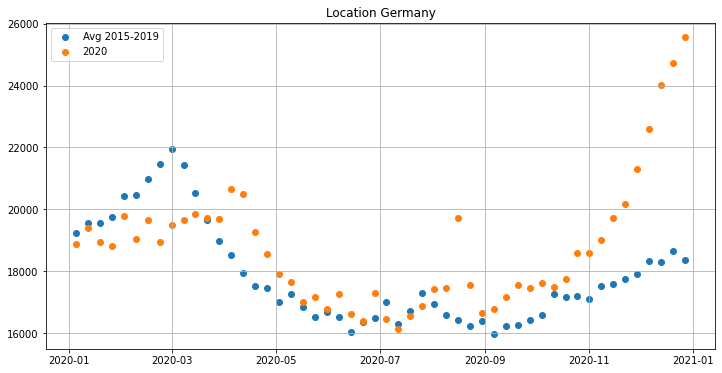

In [7]:
# plot 2020 deaths vs previous years' average
my_title = 'Location ' + my_loc
plt.figure(figsize=(12,6))
plt.scatter(df_select.date, df_select.average_deaths_2015_2019_all_ages, label='Avg 2015-2019')
plt.scatter(df_select.date, df_select.deaths_2020_all_ages, label='2020')
plt.title(my_title)
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [8]:
# add difference / relative deviation
df_select['excess_deaths'] = df_select.deaths_2020_all_ages - df_select.average_deaths_2015_2019_all_ages
df_select['excess_deaths_rel'] = df_select.excess_deaths / df_select.average_deaths_2015_2019_all_ages

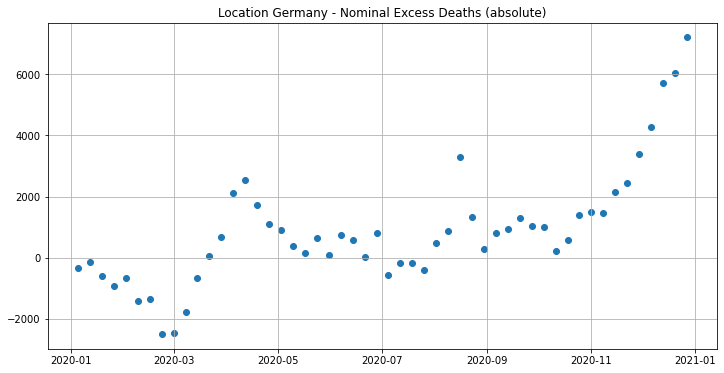

In [9]:
# plot absolute excess deaths
my_title = 'Location ' + my_loc + ' - Nominal Excess Deaths (absolute)'
plt.figure(figsize=(12,6))
plt.scatter(df_select.date, df_select.excess_deaths)
plt.title(my_title)
plt.grid()
plt.show()

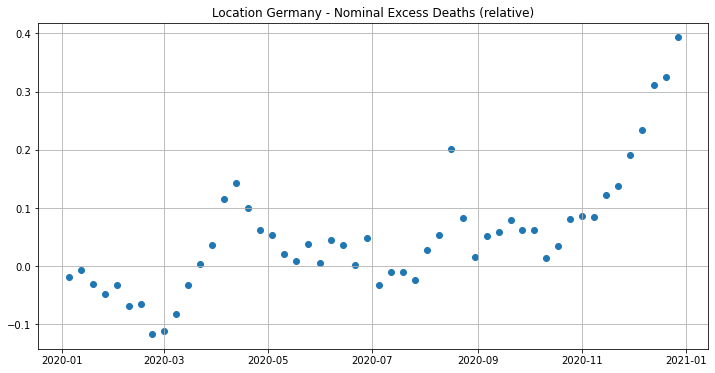

In [10]:
# plot relative excess deaths
my_title = 'Location ' + my_loc + ' - Nominal Excess Deaths (relative)'
plt.figure(figsize=(12,6))
plt.scatter(df_select.date, df_select.excess_deaths_rel)
plt.title(my_title)
plt.grid()
plt.show()

In [11]:
# Aggregation over full year
deaths_2020 = df_select.deaths_2020_all_ages.sum()
deaths_prev = df_select.average_deaths_2015_2019_all_ages.sum()

print('Annual View:')
print('============')
print('Deaths 2020          :', int(deaths_2020))
print('Avg.Deaths 2015-2019 :', deaths_prev)
print('Difference           :', deaths_2020 - deaths_prev)
print('Relative Deviation % :', np.round(100*(deaths_2020 - deaths_prev)/deaths_prev,2))

Annual View:
Deaths 2020          : 975907
Avg.Deaths 2015-2019 : 929645.0
Difference           : 46262.0
Relative Deviation % : 4.98


<a id='3'></a>
# p-Scores by Age Group

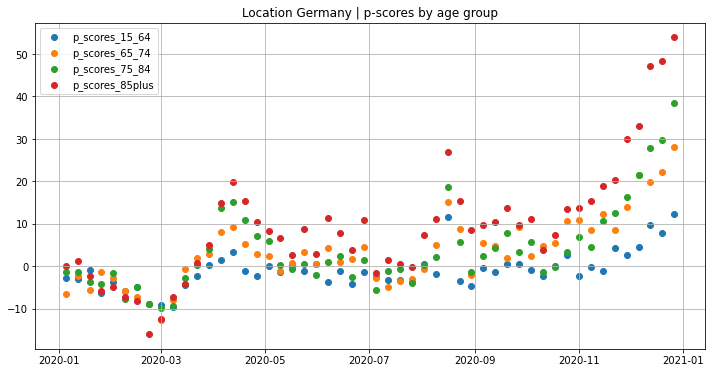

In [12]:
# plot p-scores by age group
my_title = 'Location ' + my_loc + ' | p-scores by age group'
plt.figure(figsize=(12,6))
plt.scatter(df_select.date, df_select.p_scores_15_64, label='p_scores_15_64')
plt.scatter(df_select.date, df_select.p_scores_65_74, label='p_scores_65_74')
plt.scatter(df_select.date, df_select.p_scores_75_84, label='p_scores_75_84')
plt.scatter(df_select.date, df_select.p_scores_85plus, label='p_scores_85plus')
plt.title(my_title)
plt.grid()
plt.legend(loc='upper left')
plt.show()

<a id='4'></a>
# Historical Development (looking for trends)

In [13]:
history = ['deaths_2010_all_ages', 'deaths_2011_all_ages', 'deaths_2012_all_ages',
           'deaths_2013_all_ages', 'deaths_2014_all_ages', 'deaths_2015_all_ages',
           'deaths_2016_all_ages', 'deaths_2017_all_ages', 'deaths_2018_all_ages',
           'deaths_2019_all_ages'] 

In [14]:
deaths_development = df_select[history + ['deaths_2020_all_ages']].sum()
print(deaths_development)

deaths_2010_all_ages    856653.0
deaths_2011_all_ages    849755.0
deaths_2012_all_ages    864422.0
deaths_2013_all_ages    891822.0
deaths_2014_all_ages    864911.0
deaths_2015_all_ages    923498.0
deaths_2016_all_ages    906309.0
deaths_2017_all_ages    929351.0
deaths_2018_all_ages    952295.0
deaths_2019_all_ages    936772.0
deaths_2020_all_ages    975907.0
dtype: float64


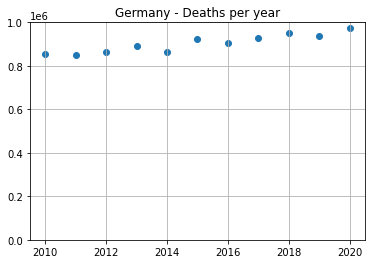

In [15]:
# plot development
plt.scatter(range(2010,2021), deaths_development.values)
plt.ylim(0,1e6)
plt.title(my_loc + ' - Deaths per year')
plt.grid()

### We see a general upward trend in 2010-2019 (probably driven by aging population) so we have to be somewhat careful in interpreting the nominal excess deaths! However, we are using only years 2015-2019 as benchmark for comparison which reduces the impact of a trend:

In [16]:
deaths_development_short_term = deaths_development[5:]
deaths_development_short_term

deaths_2015_all_ages    923498.0
deaths_2016_all_ages    906309.0
deaths_2017_all_ages    929351.0
deaths_2018_all_ages    952295.0
deaths_2019_all_ages    936772.0
deaths_2020_all_ages    975907.0
dtype: float64

In [17]:
# check if mean figure for 2015-2019 used above is correct:
deaths_development_short_term[0:5].mean()

929645.0

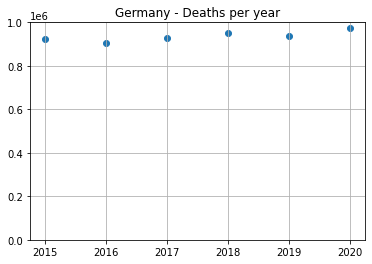

In [18]:
# plot development for 2015+ only (used for average figures above)
plt.scatter(range(2015,2021), deaths_development_short_term.values)
plt.ylim(0,1e6)
plt.title(my_loc + ' - Deaths per year')
plt.grid()

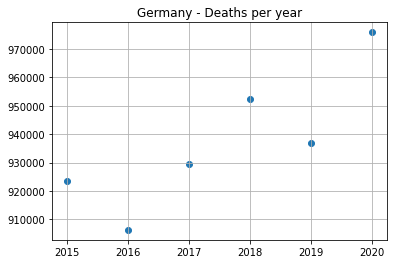

In [19]:
# zoom in
plt.scatter(range(2015,2021), deaths_development_short_term.values)
plt.title(my_loc + ' - Deaths per year')
plt.grid()